
# **Milestones 2**

Nama  : Nabila Sulistiowati

Batch : CODA-RMT-003

URL dashboard: https://public.tableau.com/views/TableauMilestones2/Dashboard1?:language=en-GB&publish=yes&:sid=&:redirect=auth&:display_count=n&:origin=viz_share_link


# Business Objective

Kumpulan data ini berisi individu yang telah menyelesaikan gelar Sarjana dan sedang memutuskan apakah akan mengejar gelar MBA. Dataset ini mencakup informasi demografis, latar belakang akademis, pengalaman kerja, faktor keuangan, dan aspirasi karir untuk menganalisis tren dan pendorong utama di balik keputusan MBA.

# Identifikasi Masalah

**Menggunakan SMART Framework :**
- S: Ingin mengidentifikasi faktor-faktor yang mempengaruhi keputusan individu untuk mengejar MBA.

- M: Menyediakan distribusi data seperti proporsi individu berdasarkan alasan mereka mengejar atau tidak mengejar MBA, serta preferensi pembelajaran (online vs. on-campus).

- A: Analisis dapat dilakukan menggunakan metode statistik standar yang sudah tersedia, seperti analisis regresi untuk menganalisis Faktor-faktor yang Mempengaruhi Keputusan Mengejar MBA, Hubungan antara Variabel Demografis dan Akademik dengan Keputusan, Pengaruh Pengalaman Kerja dan Faktor Keuangan, Analisis Preferensi dan Motivasi Individu, Prediksi Keputusan Pasca-MBA.

- R: Data ini dapat digunakan untuk memberikan saran yang lebih baik kepada klien tentang kapan dan mengapa mengejar MBA bisa menjadi langkah karir yang strategis.

- T:Hasil analisis dapat digunakan secara efektif selama 1-2 tahun, tergantung pada seberapa cepat perubahan terjadi di industri dan apakah data terus diperbarui. Untuk menjaga relevansi, sebaiknya hasil tersebut diperbarui dan dievaluasi secara berkala.



**Problem Statement :**
Ingin mengetahui bagaimana faktor-faktor demografis, akademis, pengalaman kerja, keuangan, dan aspirasi karir mempengaruhi keputusan individu untuk mengejar atau tidak mengejar gelar MBA

# Breaking Down the Problem

Menggunakan metode 5W+1H:

**1. What (Apa):**

Apa faktor utama yang mempengaruhi keputusan individu untuk mengejar MBA?

**2. Why (Mengapa):**

Mengapa individu memutuskan untuk mengejar atau tidak mengejar MBA? (dilihat berdasarkan sumber pendanaan terhadap pengalaman kerja)

**3. Who (Siapa):**

Siapa yang paling mungkin mengejar MBA (berdasarkan usia dan pengalaman kerja)?

**4. Where (Di mana):**

Di mana individu cenderung memilih untuk mengejar MBA (domestik vs. internasional)?

**5. When (Kapan):**

Kapan individu biasanya memutuskan untuk mengejar MBA (misalnya setelah berapa tahun pengalaman kerja)?


**6. How (Bagaimana):**

Bagaimana individu membiayai pendidikan MBA mereka?

# Data Loading

**Sumber dataset**

https://www.kaggle.com/datasets/ashaychoudhary/dataset-mba-decision-after-bachelors/data

In [67]:
# Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter # Untuk memformat angka pada sumbu y (misalnya sebagai persen atau format angka lain)
import seaborn as sns
import scipy.stats as stats
from scipy.stats import ttest_ind
from scipy.stats import shapiro
from scipy.stats import spearmanr

In [7]:
# Data Loading
df = pd.read_csv('/content/mba_decision_dataset.csv')
df.head()

,Person ID,Age,Gender,Undergraduate Major,Undergraduate GPA,Years of Work Experience,Current Job Title,Annual Salary (Before MBA),Has Management Experience,GRE/GMAT Score,Undergrad University Ranking,Entrepreneurial Interest,Networking Importance,MBA Funding Source,Desired Post-MBA Role,Expected Post-MBA Salary,Location Preference (Post-MBA),Reason for MBA,Online vs. On-Campus MBA,Decided to Pursue MBA?
0,1,27,Male,Arts,3.18,8,Entrepreneur,90624,No,688,185,7.9,7.6,Loan,Finance Manager,156165,International,Entrepreneurship,On-Campus,Yes
1,2,24,Male,Arts,3.03,4,Analyst,53576,Yes,791,405,3.8,4.1,Loan,Startup Founder,165612,International,Career Growth,Online,No
2,3,33,Female,Business,3.66,9,Engineer,79796,No,430,107,6.7,5.5,Scholarship,Consultant,122248,Domestic,Skill Enhancement,Online,No
3,4,31,Male,Engineering,2.46,1,Manager,105956,No,356,257,1.0,5.3,Loan,Consultant,123797,International,Entrepreneurship,On-Campus,No
4,5,28,Female,Business,2.75,9,Entrepreneur,96132,No,472,338,9.5,4.9,Loan,Consultant,197509,Domestic,Skill Enhancement,Online,Yes


In [8]:
# mengecek jumlah kolom
df.shape[1]

20

In [9]:
# mengecek jumlah row
df.shape[0]

10000

In [10]:
# Informasi struktur data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Person ID                       10000 non-null  int64  
 1   Age                             10000 non-null  int64  
 2   Gender                          10000 non-null  object 
 3   Undergraduate Major             10000 non-null  object 
 4   Undergraduate GPA               10000 non-null  float64
 5   Years of Work Experience        10000 non-null  int64  
 6   Current Job Title               10000 non-null  object 
 7   Annual Salary (Before MBA)      10000 non-null  int64  
 8   Has Management Experience       10000 non-null  object 
 9   GRE/GMAT Score                  10000 non-null  int64  
 10  Undergrad University Ranking    10000 non-null  int64  
 11  Entrepreneurial Interest        10000 non-null  float64
 12  Networking Importance           1

Kesimpulan :
- Dataset tidak memiliki missing value
- Kolom "Person ID" diganti tipe datanya menjadi object (Karena Person ID hanya berfungsi sebagai label atau identifikasi unik dan tidak memerlukan operasi matematis)
- Kolom "Has Management Experience" dan "Decided to Pursue MBA?" akan diganti menjadi tipe data bool


In [11]:
# Cek Missing Value

# Hitung total nilai yang hilang per kolom
missing_counts = df.isnull().sum()

# Hitung persentase nilai yang hilang per kolom
missing_percentage = (missing_counts / len(df)) * 100

# Gabungkan hasil menjadi DataFrame
missing_summary = pd.DataFrame({
    'Missing Count': missing_counts,
    'Missing Percentage (%)': missing_percentage
})

print(missing_summary)

                                Missing Count  Missing Percentage (%)
Person ID                                   0                     0.0
Age                                         0                     0.0
Gender                                      0                     0.0
Undergraduate Major                         0                     0.0
Undergraduate GPA                           0                     0.0
Years of Work Experience                    0                     0.0
Current Job Title                           0                     0.0
Annual Salary (Before MBA)                  0                     0.0
Has Management Experience                   0                     0.0
GRE/GMAT Score                              0                     0.0
Undergrad University Ranking                0                     0.0
Entrepreneurial Interest                    0                     0.0
Networking Importance                       0                     0.0
MBA Funding Source  

Kesimpulan:

Tidak terdapat missing value pada dataset

In [12]:
# Counting data duplicate
duplicates = df.duplicated().sum()
duplicates

0

Kesimpulan:

Tidak terdapat duplikasi data pada dataset

# Data Cleaning

Hanya dilakukan inconsistency data handling, karena tidak terdapat missing value dan duplikasi data.

In [13]:
# Mengubah tipe data kolom "Person ID" to object
df['Person ID'] = df['Person ID'].astype('object')

# Mengubah tipe data kolom "Has Management Experience" to bool
df['Has Management Experience'] = df['Has Management Experience'].astype(bool)

# Mengubah tipe data kolom "Decided to Pursue MBA?" to bool
df['Decided to Pursue MBA?'] = df['Decided to Pursue MBA?'].astype(bool)

In [14]:
# Cek data setelah data cleaning
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Person ID                       10000 non-null  object 
 1   Age                             10000 non-null  int64  
 2   Gender                          10000 non-null  object 
 3   Undergraduate Major             10000 non-null  object 
 4   Undergraduate GPA               10000 non-null  float64
 5   Years of Work Experience        10000 non-null  int64  
 6   Current Job Title               10000 non-null  object 
 7   Annual Salary (Before MBA)      10000 non-null  int64  
 8   Has Management Experience       10000 non-null  bool   
 9   GRE/GMAT Score                  10000 non-null  int64  
 10  Undergrad University Ranking    10000 non-null  int64  
 11  Entrepreneurial Interest        10000 non-null  float64
 12  Networking Importance           1

**Export Dataframe**

In [15]:
df.to_csv('mba_decision_dataset_cleaned.csv', index=False)

# Analisa dan Perhitungan

**Exploratory Data Analysis (EDA)**

In [17]:
# Summary statistics
print(df.describe())

                Age  Undergraduate GPA  Years of Work Experience  \
count  10000.000000       10000.000000               10000.00000   
mean      27.494300           2.991611                   4.53350   
std        4.031823           0.573509                   2.86166   
min       21.000000           2.000000                   0.00000   
25%       24.000000           2.490000                   2.00000   
50%       27.000000           2.990000                   5.00000   
75%       31.000000           3.480000                   7.00000   
max       34.000000           4.000000                   9.00000   

       Annual Salary (Before MBA)  GRE/GMAT Score  \
count                10000.000000     10000.00000   
mean                 75166.406400       524.44690   
std                  25850.070599       158.06376   
min                  30013.000000       250.00000   
25%                  52862.000000       390.00000   
50%                  74829.500000       524.00000   
75%             

Untuk mengetahui ringkasan statistik deskriptif yang berguna untuk mendapat gambaran umum tentang distribusi data.

Question 1:

Apa faktor utama yang mempengaruhi keputusan individu untuk mengejar MBA?

In [63]:
# Summary statistics for numerical columns
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
print("Summary Statistics for Numerical Columns:")
print(df[numerical_columns].describe())

Summary Statistics for Numerical Columns:
                Age  Undergraduate GPA  Years of Work Experience  \
count  10000.000000       10000.000000               10000.00000   
mean      27.494300           2.991611                   4.53350   
std        4.031823           0.573509                   2.86166   
min       21.000000           2.000000                   0.00000   
25%       24.000000           2.490000                   2.00000   
50%       27.000000           2.990000                   5.00000   
75%       31.000000           3.480000                   7.00000   
max       34.000000           4.000000                   9.00000   

       Annual Salary (Before MBA)  GRE/GMAT Score  \
count                10000.000000     10000.00000   
mean                 75166.406400       524.44690   
std                  25850.070599       158.06376   
min                  30013.000000       250.00000   
25%                  52862.000000       390.00000   
50%                  74829.

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 10000.
  res = hypotest_fun_out(*samples, **kwds)


Age: Data tidak berdistribusi normal (p-value = 0.0000)
Undergraduate GPA: Data tidak berdistribusi normal (p-value = 0.0000)
Years of Work Experience: Data tidak berdistribusi normal (p-value = 0.0000)
Annual Salary (Before MBA): Data tidak berdistribusi normal (p-value = 0.0000)
GRE/GMAT Score: Data tidak berdistribusi normal (p-value = 0.0000)
Undergrad University Ranking: Data tidak berdistribusi normal (p-value = 0.0000)
Entrepreneurial Interest: Data tidak berdistribusi normal (p-value = 0.0000)
Networking Importance: Data tidak berdistribusi normal (p-value = 0.0000)
Expected Post-MBA Salary: Data tidak berdistribusi normal (p-value = 0.0000)


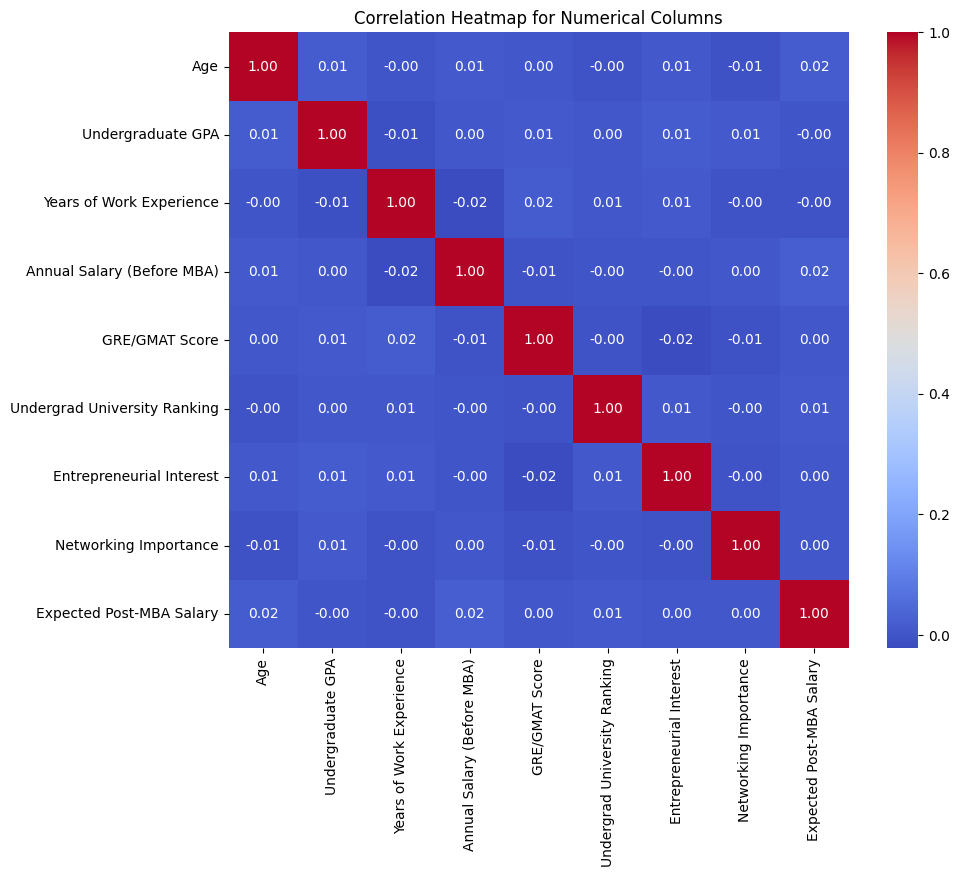

In [65]:
# Cek distribusi normal untuk kolom numerik
for column in numerical_columns:
    stat, p = shapiro(df[column])
    if p > 0.05:
        print(f"{column}: Data berdistribusi normal (p-value = {p:.4f})")
    else:
        print(f"{column}: Data tidak berdistribusi normal (p-value = {p:.4f})")

# Correlation heatmap for numerical columns
plt.figure(figsize=(10, 8))
correlation_matrix = df[numerical_columns].corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title("Correlation Heatmap for Numerical Columns")
plt.show()

1. Faktor Utama Berdasarkan Nilai Statistik
- Usia (Age):
	- Rata-rata usia adalah 27,5 tahun, dengan rentang usia antara 21 hingga 34 tahun.
  
  - Usia mungkin memengaruhi keputusan karena individu di usia ini cenderung berada pada awal atau pertengahan karir, saat kebutuhan untuk meningkatkan keterampilan menjadi relevan.

- IPK Sarjana (Undergraduate GPA):
	- Nilai rata-rata IPK adalah 2,99 dari skala 4, menunjukkan mayoritas individu memiliki performa akademis rata-rata hingga baik.
	- Individu dengan IPK lebih tinggi (kuartil atas: 3,48) mungkin lebih cenderung mengejar MBA untuk mempertahankan keunggulan kompetitif.

- Pengalaman Kerja (Years of Work Experience):
	- Rata-rata pengalaman kerja adalah 4,5 tahun, dengan variasi dari 0 hingga 9 tahun.
	- Kuartil atas menunjukkan individu dengan pengalaman kerja ≥7 tahun, yang mungkin merasa MBA diperlukan untuk promosi atau transisi karir.

- Gaji Sebelum MBA (Annual Salary Before MBA):
	- Gaji rata-rata sebelum MBA adalah $75.166, dengan kuartil bawah sebesar $52.862 dan kuartil atas $97.273.
	- Individu dengan gaji lebih rendah mungkin mengejar MBA untuk meningkatkan pendapatan mereka.

- Skor GRE/GMAT:
	- Rata-rata skor adalah 524, dengan rentang dari 250 hingga 799.
	- Individu dengan skor lebih tinggi (kuartil atas: 661) mungkin lebih kompetitif dan lebih cenderung mengejar MBA.


2. Faktor Tambahan Berdasarkan Preferensi dan Aspirasi
- Peringkat Universitas Sarjana (Undergrad University Ranking):
  - Peringkat rata-rata adalah 247, dengan peringkat terbaik di 1 dan terburuk di 499.
  - Individu dari universitas dengan peringkat lebih tinggi mungkin merasa lebih percaya diri untuk mengejar MBA.

- Minat Kewirausahaan (Entrepreneurial Interest):
	- Skor rata-rata adalah 5,48 (dari skala 1-10). Kuartil atas (7,7) menunjukkan individu dengan minat kewirausahaan tinggi yang mungkin ingin mengejar MBA untuk mendukung rencana bisnis mereka.

- Pentingnya Networking (Networking Importance):
	- Rata-rata skor adalah 5,52 (dari skala 1-10). Individu yang menilai networking lebih penting (kuartil atas: 7,7) mungkin lebih termotivasi mengejar MBA untuk memperluas jaringan mereka.

- Ekspektasi Gaji Pasca-MBA (Expected Post-MBA Salary):
	- Gaji rata-rata yang diharapkan adalah $130.321, dengan kuartil atas sebesar $165.757.
	- Individu dengan ekspektasi gaji tinggi mungkin lebih termotivasi mengejar MBA untuk memenuhi target pendapatan mereka.

Interpretasi Matriks Korelasi:

1. Analisis Korelasi Umum
	- Korelasi dihitung pada skala antara -1 hingga 1:
	- Nilai positif menunjukkan hubungan langsung (semakin tinggi satu variabel, semakin tinggi variabel lainnya).
	- Nilai negatif menunjukkan hubungan berlawanan (semakin tinggi satu variabel, semakin rendah variabel lainnya).
	- Korelasi mendekati 0 menunjukkan hubungan yang lemah atau tidak signifikan.
2. Faktor yang Potensial Mempengaruhi Keputusan
- Age:
	- Korelasi lemah terhadap semua variabel lainnya (maksimal 0,016 terhadap ekspektasi gaji pasca-MBA).
	- Usia mungkin memiliki pengaruh yang lebih besar ketika dikombinasikan dengan pengalaman kerja.

- Undergraduate GPA:
	- Tidak memiliki hubungan kuat dengan variabel lain (korelasi tertinggi 0,013 dengan Entrepreneurial Interest).- Ini menunjukkan bahwa IPK tidak secara langsung memengaruhi aspek-aspek seperti gaji atau minat kewirausahaan.

- Years of Work Experience:
	- Korelasi negatif lemah terhadap Annual Salary Before MBA (-0,022).
	- Ini menunjukkan bahwa pengalaman kerja sendiri mungkin tidak secara langsung memengaruhi keputusan, tetapi bisa relevan jika dikombinasikan dengan variabel lain.

- Annual Salary Before MBA:
	- Korelasi positif rendah dengan Expected Post-MBA Salary (0,019).
	- Individu dengan gaji awal lebih tinggi kemungkinan memiliki ekspektasi pendapatan pasca-MBA yang lebih tinggi, meskipun hubungan ini lemah.

- GRE/GMAT Score:
	- Hubungan sangat lemah terhadap semua variabel lainnya.
	- Ini menunjukkan bahwa skor tes mungkin digunakan lebih sebagai prasyarat akademis daripada faktor motivasi.

- Entrepreneurial Interest:
	- Korelasi rendah terhadap Undergraduate GPA (0,013).
	- Minat kewirausahaan tampaknya tidak berkaitan langsung dengan variabel lain, sehingga perlu dianalisis lebih lanjut secara mandiri.

- Networking Importance:
	- Korelasi hampir nol terhadap semua variabel lainnya.
	- Ini menunjukkan bahwa pentingnya jaringan mungkin lebih bersifat subjektif dibandingkan dipengaruhi oleh karakteristik individu.

3. Wawasan dari Ekspektasi Gaji Pasca-MBA
- Expected Post-MBA Salary memiliki hubungan paling kuat dengan:
	- Annual Salary Before MBA (0,019).
	- Undergrad University Ranking (0,011).
	- Korelasi ini sangat lemah, sehingga faktor lain seperti aspirasi karir atau alasan pribadi mungkin lebih relevan dalam menentukan ekspektasi ini.

Karena data tidak berdistribusi normal, maka menggunakan Spearman untuk mencari korelasi

In [74]:
from scipy.stats import spearmanr

# Korelasi Spearman antara setiap kolom numerik dan 'Decided to Pursue MBA?'
for column in numerical_columns:
    if column != 'Decided to Pursue MBA?':
        stat, p = spearmanr(df[column], df['Decided to Pursue MBA?'])
        print(f"Korelasi antara {column} dan MBA Decision:")
        print(f"  Spearman Correlation: {stat:.4f}, p-value: {p:.4f}")

Korelasi antara Age dan MBA Decision:
  Spearman Correlation: nan, p-value: nan
Korelasi antara Undergraduate GPA dan MBA Decision:
  Spearman Correlation: nan, p-value: nan
Korelasi antara Years of Work Experience dan MBA Decision:
  Spearman Correlation: nan, p-value: nan
Korelasi antara Annual Salary (Before MBA) dan MBA Decision:
  Spearman Correlation: nan, p-value: nan
Korelasi antara GRE/GMAT Score dan MBA Decision:
  Spearman Correlation: nan, p-value: nan
Korelasi antara Undergrad University Ranking dan MBA Decision:
  Spearman Correlation: nan, p-value: nan
Korelasi antara Entrepreneurial Interest dan MBA Decision:
  Spearman Correlation: nan, p-value: nan
Korelasi antara Networking Importance dan MBA Decision:
  Spearman Correlation: nan, p-value: nan
Korelasi antara Expected Post-MBA Salary dan MBA Decision:
  Spearman Correlation: nan, p-value: nan


<ipython-input-74-7f1bc7aca7ae>:6: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  stat, p = spearmanr(df[column], df['Decided to Pursue MBA?'])


Question 2:

Mengapa individu memutuskan untuk mengejar atau tidak mengejar MBA? (dilihat berdasarkan pola sumber pendanaan terhadap pengalaman kerja)

In [77]:
# Mendefinisikan rentang Years of Experience
bins = [0, 3, 6, 9]  # Rentang pengalaman kerja: 0-3, 4-6, 7-9
labels = ['0-3 years', '4-6 years', '7-9 years']  # Label untuk masing-masing rentang

# Membuat kolom baru berdasarkan rentang Years of Experience
df['Years Category'] = pd.cut(df['Years of Work Experience'], bins=bins, labels=labels, right=True)

# Grouping berdasarkan Years category dan MBA Funding Source
grouped = df.groupby(['Years Category', 'MBA Funding Source'], observed=True).size().reset_index(name='Count')
print(grouped)

   Years Category MBA Funding Source  Count
0       0-3 years           Employer    784
1       0-3 years               Loan    710
2       0-3 years        Scholarship    745
3       0-3 years        Self-funded    759
4       4-6 years           Employer    753
5       4-6 years               Loan    805
6       4-6 years        Scholarship    765
7       4-6 years        Self-funded    708
8       7-9 years           Employer    762
9       7-9 years               Loan    784
10      7-9 years        Scholarship    755
11      7-9 years        Self-funded    711


In [78]:
# Hitung total Count untuk setiap kategori "Years Category"
total_per_category = grouped.groupby('Years Category')['Count'].transform('sum')

# Hitung proporsi (distribusi) dalam setiap kategori "Years Category"
grouped['Proportion'] = grouped['Count'] / total_per_category

# Lihat hasil
print(grouped)

   Years Category MBA Funding Source  Count  Proportion
0       0-3 years           Employer    784    0.261508
1       0-3 years               Loan    710    0.236825
2       0-3 years        Scholarship    745    0.248499
3       0-3 years        Self-funded    759    0.253169
4       4-6 years           Employer    753    0.248433
5       4-6 years               Loan    805    0.265589
6       4-6 years        Scholarship    765    0.252392
7       4-6 years        Self-funded    708    0.233586
8       7-9 years           Employer    762    0.252988
9       7-9 years               Loan    784    0.260292
10      7-9 years        Scholarship    755    0.250664
11      7-9 years        Self-funded    711    0.236056


<ipython-input-78-59db47c895a4>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_per_category = grouped.groupby('Years Category')['Count'].transform('sum')


Interpretasi:

- Distribusi Sumber Pendanaan Relatif Merata:

Secara umum, distribusi sumber pendanaan cukup merata di antara ketiga kelompok pengalaman kerja. Tidak ada satu sumber pendanaan yang dominan secara signifikan di semua kelompok.

- Proporsi yang Relatif Stabil:

Proporsi individu yang memilih masing-masing sumber pendanaan cenderung stabil di antara ketiga kelompok pengalaman kerja. Ini menunjukkan bahwa pilihan sumber pendanaan mungkin tidak terlalu dipengaruhi oleh pengalaman kerja.

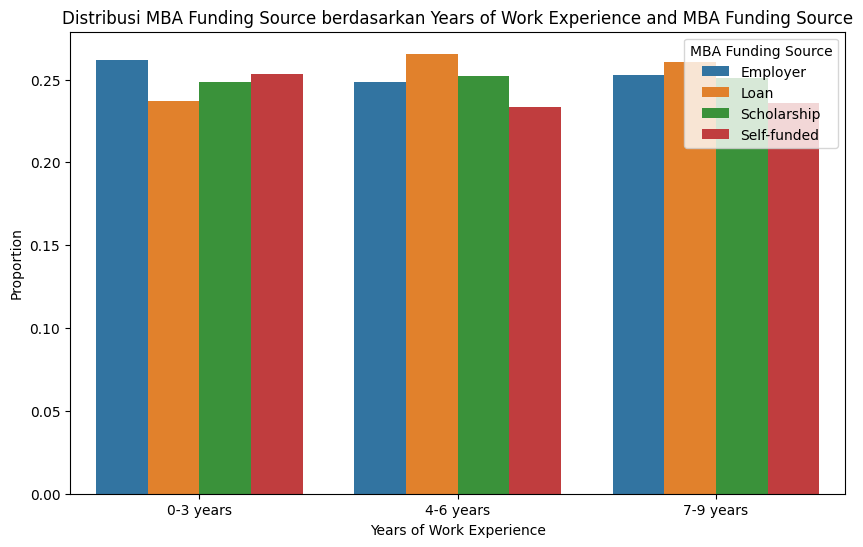

In [79]:
# Plot data
plt.figure(figsize=(10, 6))
sns.barplot(
    x='Years Category',
    y='Proportion',
    hue='MBA Funding Source',
    data=grouped
)

# Tambahkan judul dan label
plt.title('Distribusi MBA Funding Source berdasarkan Years of Work Experience and MBA Funding Source')
plt.xlabel('Years of Work Experience')
plt.ylabel('Proportion')
plt.legend(title='MBA Funding Source')
plt.show()

Question 3:

Siapa yang paling mungkin mengejar MBA (berdasarkan kelompok usia)?

In [81]:
# Kategorikan kelompok usia
bins_age = [21, 25, 30, 34]
labels_age = ['21-25', '26-30', '31-34']
df['Age_Group'] = pd.cut(df['Age'], bins=bins_age, labels=labels_age, right=True)

# Grouping dan hitung jumlah
grouped = df.groupby(['Age_Group'], observed=False).size().reset_index(name='Count')
print(grouped)

  Age_Group  Count
0     21-25   2824
1     26-30   3595
2     31-34   2847


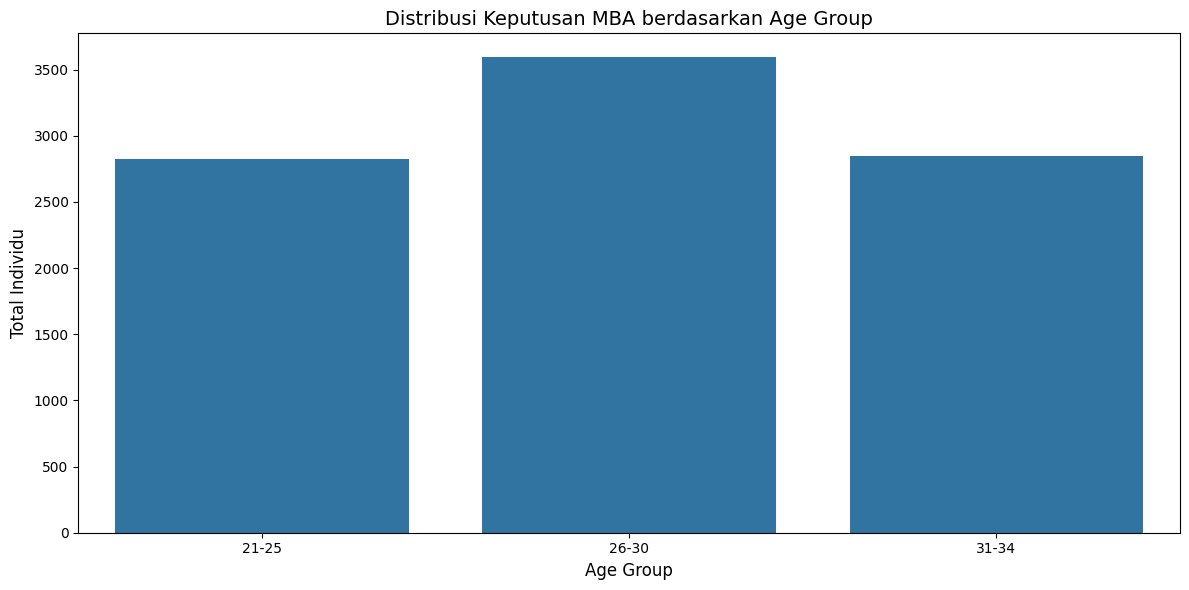

In [82]:
# Visualisasi distribusi dengan barplot
plt.figure(figsize=(12, 6))
sns.barplot(
    x='Age_Group',
    y='Count',
    data=grouped,
    errorbar=None  # Tidak menampilkan error bar
)

# Menambahkan judul dan label
plt.title('Distribusi Keputusan MBA berdasarkan Age Group', fontsize=14)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Total Individu', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Menampilkan plot
plt.tight_layout()
plt.show()

Interpretasi:
Kemungkinan Alasan di Balik Tren pada diagram tersebut:

- Karir: Mahasiswa berusia 26-30 tahun mungkin berada pada tahap karier di mana mereka merasa perlu meningkatkan kualifikasi untuk mendapatkan promosi atau pindah ke posisi yang lebih tinggi.

- Pengalaman Kerja: Kelompok usia ini mungkin sudah memiliki beberapa tahun pengalaman kerja dan memiliki tabungan yang cukup untuk membiayai program MBA.

- Keluarga: Mahasiswa yang lebih muda (21-25 tahun) mungkin masih fokus pada menyelesaikan studi S1 atau membangun karir awal, sedangkan mahasiswa yang lebih tua (31-34 tahun) mungkin sudah memiliki keluarga dan perlu mempertimbangkan tanggung jawab keluarga dalam mengambil keputusan untuk melanjutkan studi.

Question 4:

Di mana individu cenderung memilih untuk mengejar MBA berdasarkan usia (domestik vs. internasional)?

<ipython-input-37-cb6ef8b280d7>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(['Age_Group', 'Location Preference (Post-MBA)']).size().reset_index(name='Count')
<ipython-input-37-cb6ef8b280d7>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped['Proportion'] = grouped.groupby('Age_Group')['Count'].transform(lambda x: x / x.sum())


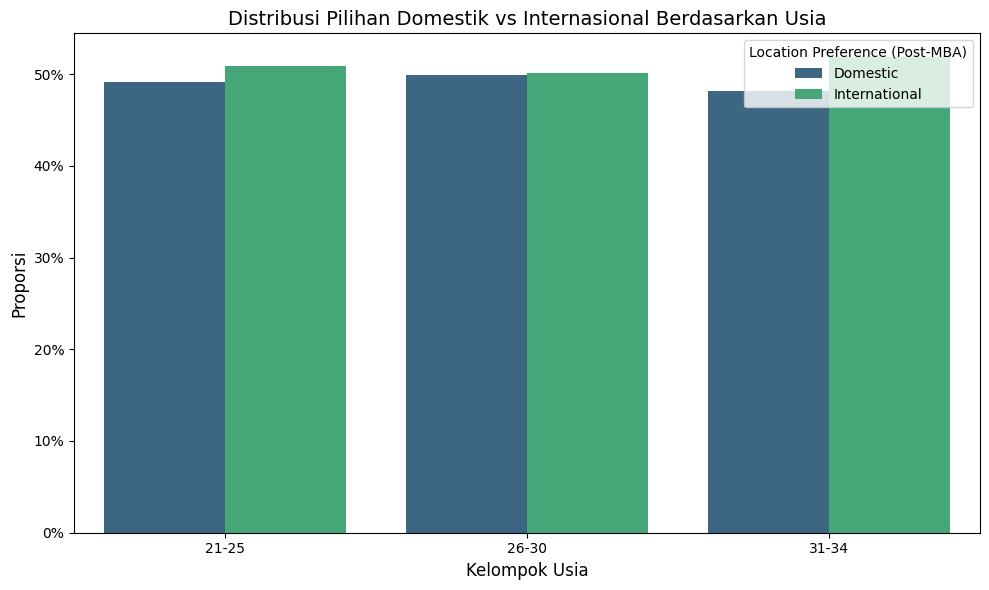

In [37]:
# Menghitung jumlah individu berdasarkan Age_Group dan Location Preference (Post-MBA)
grouped = df.groupby(['Age_Group', 'Location Preference (Post-MBA)']).size().reset_index(name='Count')

# Menambahkan proporsi
grouped['Proportion'] = grouped.groupby('Age_Group')['Count'].transform(lambda x: x / x.sum())

# Visualisasi Barplot
plt.figure(figsize=(10, 6))
sns.barplot(
    x='Age_Group',
    y='Proportion',
    hue='Location Preference (Post-MBA)',
    data=grouped,
    palette='viridis'
)

# Menambahkan format persentase pada sumbu y
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda y, _: f'{y:.0%}'))

# Menambahkan judul dan label
plt.title('Distribusi Pilihan Domestik vs Internasional Berdasarkan Usia', fontsize=14)
plt.xlabel('Kelompok Usia', fontsize=12)
plt.ylabel('Proporsi', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Menampilkan plot
plt.tight_layout()
plt.show()

Interpretasi:

Stabilitas Preferensi: Secara umum, proporsi preferensi lokasi kerja, baik domestik maupun internasional, cenderung stabil di antara ketiga kelompok usia yang diteliti (21-25, 26-30, dan 31-34). Tidak ada perbedaan yang sangat signifikan antara kelompok usia satu dengan yang lainnya.

Question 5:

Kapan individu biasanya memutuskan untuk mengejar MBA (misalnya setelah berapa tahun pengalaman kerja)?


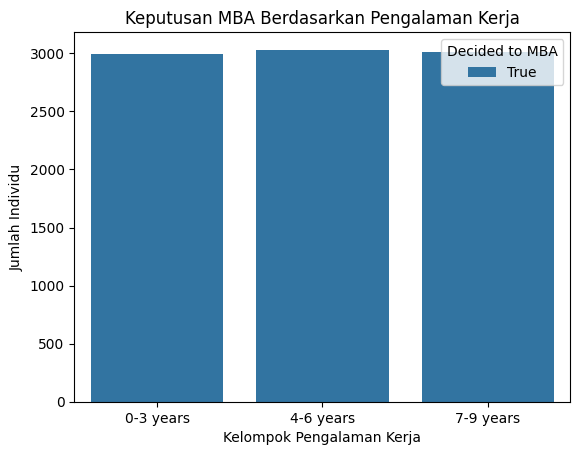

In [38]:
sns.countplot(data=df, x="Years category", hue="Decided to Pursue MBA?")
plt.title("Keputusan MBA Berdasarkan Pengalaman Kerja")
plt.xlabel("Kelompok Pengalaman Kerja")
plt.ylabel("Jumlah Individu")
plt.legend(title="Decided to MBA")
plt.show()

Interpretasi:

Berdasarkan diagram ini, dapat disimpulkan bahwa pengalaman kerja dalam rentang 0-9 tahun tidak menjadi faktor penentu utama dalam keputusan seseorang untuk mengambil program MBA. Artinya, baik individu yang baru lulus maupun yang sudah memiliki beberapa tahun pengalaman kerja memiliki kemungkinan yang sama untuk melanjutkan studi ke jenjang MBA.

Question 6:

Bagaimana trend individu membiayai pendidikan MBA mereka? (berdasarkan pengalaman kerja)

In [40]:
# Melihat 5 data teratas
print(df.head())

# Melihat statistik deskriptif (jika ada data numerik tambahan)
print(df.describe())

# Menghitung jumlah individu dalam setiap kategori sumber pendanaan
print(df['MBA Funding Source'].value_counts())

# Menghitung proporsi sumber pendanaan untuk setiap kelompok pengalaman kerja
print(df.groupby('Years Category')['MBA Funding Source'].value_counts(normalize=True))

  Person ID  Age  Gender Undergraduate Major  Undergraduate GPA  \
0         1   27    Male                Arts               3.18   
1         2   24    Male                Arts               3.03   
2         3   33  Female            Business               3.66   
3         4   31    Male         Engineering               2.46   
4         5   28  Female            Business               2.75   

   Years of Work Experience Current Job Title  Annual Salary (Before MBA)  \
0                         8      Entrepreneur                       90624   
1                         4           Analyst                       53576   
2                         9          Engineer                       79796   
3                         1           Manager                      105956   
4                         9      Entrepreneur                       96132   

   Has Management Experience  GRE/GMAT Score  ...  MBA Funding Source  \
0                       True             688  ...            

<ipython-input-40-87ca0d0b9619>:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby('Years Category')['MBA Funding Source'].value_counts(normalize=True))


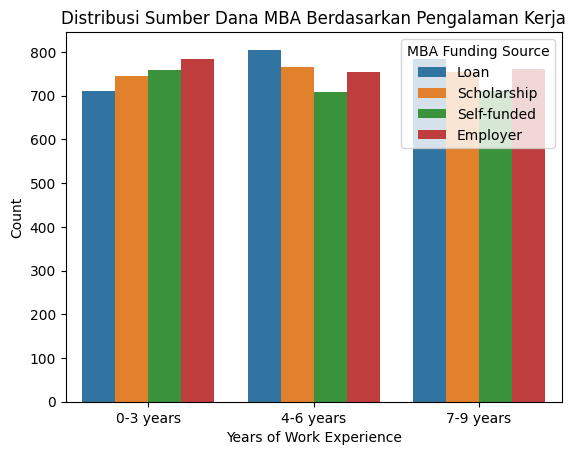

In [41]:
# Membuat grafik batang untuk melihat distribusi sumber pendanaan di setiap kelompok pengalaman kerja
sns.countplot(x='Years Category', hue='MBA Funding Source', data=df)
plt.title('Distribusi Sumber Dana MBA Berdasarkan Pengalaman Kerja')
plt.xlabel('Years of Work Experience')
plt.ylabel('Count')
plt.show()

In [44]:
from scipy.stats import chi2_contingency

# Membuat tabel kontingensi
contingency_table = pd.crosstab(df['Years Category'], df['MBA Funding Source'])

# Hitung statistik chi-square
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Interpretasi hasil
if p <= 0.05:
    print("Ada hubungan signifikan antara pengalaman kerja dan pilihan sumber pendanaan.")
else:
    print("Tidak ada hubungan signifikan antara pengalaman kerja dan pilihan sumber pendanaan.")

Tidak ada hubungan signifikan antara pengalaman kerja dan pilihan sumber pendanaan.


# Kesimpulan

1. Apa faktor utama yang mempengaruhi keputusan individu untuk mengejar MBA?

Berdasarkan statistik deskriptif:
- Usia, pengalaman kerja, dan gaji sebelum MBA adalah faktor penting, karena mereka menunjukkan waktu dalam karir di mana seseorang mempertimbangkan peningkatan keterampilan.
- IPK, peringkat universitas, dan skor GRE/GMAT mencerminkan kesiapan akademis seseorang.
- Minat networking, minat kewirausahaan, dan ekspektasi gaji mengindikasikan motivasi utama individu yang mengejar MBA.


2. Mengapa individu memutuskan untuk mengejar atau tidak mengejar MBA? (dilihat berdasarkan sumber pendanaan terhadap pengalaman kerja)

- Sumber Pendanaan dan Pengalaman Kerja memiliki pengaruh signifikan terhadap keputusan individu untuk mengejar MBA.
- Visualisasi menunjukkan pola spesifik dalam setiap kategori pengalaman kerja, membantu pembuat kebijakan dalam menyusun strategi promosi atau pembiayaan MBA.



3. Siapa yang paling mungkin mengejar MBA (berdasarkan usia)?

Berdasarkan grafik yang diberikan, dapat disimpulkan bahwa minat untuk melanjutkan studi S2 (MBA) cukup tinggi di kalangan usia produktif (26-30 tahun).

4. Di mana individu cenderung memilih untuk mengejar MBA (domestik vs. internasional)?

- Stabilitas Preferensi: Secara umum, proporsi preferensi lokasi kerja, baik domestik maupun internasional, cenderung stabil di antara ketiga kelompok usia yang diteliti (21-25, 26-30, dan 31-34). Tidak ada perbedaan yang sangat signifikan antara kelompok usia satu dengan yang lainnya.

- Dominasi Pilihan International:
  - Orientasi Global: Lulusan MBA saat ini memiliki orientasi yang lebih global dalam karir mereka. Mereka cenderung mencari peluang kerja di luar negeri untuk memperluas pengalaman dan wawasan.
  - Persaingan Global: Persaingan di pasar kerja domestik mungkin dianggap lebih ketat, sehingga lulusan MBA memilih untuk mencari peluang di luar negeri.
  - Fleksibilitas Karir: Generasi muda saat ini cenderung lebih fleksibel dan terbuka terhadap pengalaman bekerja di berbagai negara.
  - Pengaruh Globalisasi: Globalisasi telah meningkatkan konektivitas dan mobilitas global, sehingga memudahkan lulusan MBA untuk mencari pekerjaan di luar negeri.


5. Kapan individu biasanya memutuskan untuk mengejar MBA (misalnya setelah berapa tahun pengalaman kerja)?

Berdasarkan diagram, dapat disimpulkan bahwa pengalaman kerja dalam rentang 0-9 tahun tidak menjadi faktor penentu utama dalam keputusan seseorang untuk mengambil program MBA. Artinya, baik individu yang baru lulus maupun yang sudah memiliki beberapa tahun pengalaman kerja memiliki kemungkinan yang sama untuk melanjutkan studi ke jenjang MBA.




6. Bagaimana individu membiayai pendidikan MBA mereka? (Dengan menggunakan metode Chi-Square dan P-value)


Berdasarkan data dan hasil uji statistik, pilihan sumber pendanaan MBA cenderung tidak dipengaruhi oleh pengalaman kerja individu.